In [62]:
#!pip install pandas   
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Import Dataset 

In [64]:
# # Option 1: Use double backslashes
# df = pd.read_csv("C:\\Users\\HP\\Documents\\PW Skills\\Project\\Diwali Sales Data.csv", encoding="unicode_escape")

# # Option 2: Use a raw string
# df = pd.read_csv(r"C:\Users\HP\Documents\PW Skills\Project\Diwali Sales Data.csv", encoding="unicode_escape")

In [65]:
#df = pd.read_csv(r"C:\Users\HP\Documents\PW Skills\Project\Diwali Sales Data.csv",encoding="unicode_escape")
df = pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape') ## the python file and csv file should be in a same foider else it returns error

In [66]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [67]:
df.shape

(11251, 15)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


- change the columns to lower case
- remove status and unnnamed column
- change the amt to int

## Lower the columns name

In [69]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [70]:
df.columns = df.columns.str.lower()

### here status and unmarried column has no data so we can remove the column

In [71]:
df.drop(['status','unnamed1'],axis=1,inplace = True)

In [72]:
df.isnull().sum()

user_id              0
cust_name            0
product_id           0
gender               0
age group            0
age                  0
marital_status       0
state                0
zone                 0
occupation           0
product_category     0
orders               0
amount              12
dtype: int64

### Drop the row with null values 

In [73]:
df.dropna(inplace=True)

In [74]:
df.isnull().sum()

user_id             0
cust_name           0
product_id          0
gender              0
age group           0
age                 0
marital_status      0
state               0
zone                0
occupation          0
product_category    0
orders              0
amount              0
dtype: int64

## Change the data type 

In [75]:
df['amount'] = df['amount'].astype('int')

### check the data type

In [76]:
df.amount.dtype

dtype('int32')

## Rename column name 

In [77]:
#df.rename(columns={'marital_status':'shaadi'},inplace=True)
#df.head()

### Describes the numeric columns

In [78]:
df.describe()

,user_id,age,marital_status,orders,amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### use describe for specific columns

In [79]:
 df[['age','marital_status','orders','amount']].describe()

,age,marital_status,orders,amount
count,11239.000000,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,2.489634,9453.610553
std,12.753866,0.493589,1.114967,5222.355168
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12675.000000
max,92.000000,1.000000,4.000000,23952.000000


Upto 2 Decimal points

In [80]:
 df[['age','marital_status','orders','amount']].describe().round(2)

,age,marital_status,orders,amount
count,11239.00,11239.00,11239.00,11239.00
mean,35.41,0.42,2.49,9453.61
std,12.75,0.49,1.11,5222.36
min,12.00,0.00,1.00,188.00
25%,27.00,0.00,2.00,5443.00
50%,33.00,0.00,2.00,8109.00
75%,43.00,1.00,3.00,12675.00
max,92.00,1.00,4.00,23952.00


If you want to see the result in whole number

In [81]:
summary = df[['age','marital_status','orders','amount']].describe()
summary.astype(int)

,age,marital_status,orders,amount
count,11239,11239,11239,11239
mean,35,0,2,9453
std,12,0,1,5222
min,12,0,1,188
25%,27,0,2,5443
50%,33,0,2,8109
75%,43,1,3,12675
max,92,1,4,23952


# Exploratory Data Analysis

## Gender

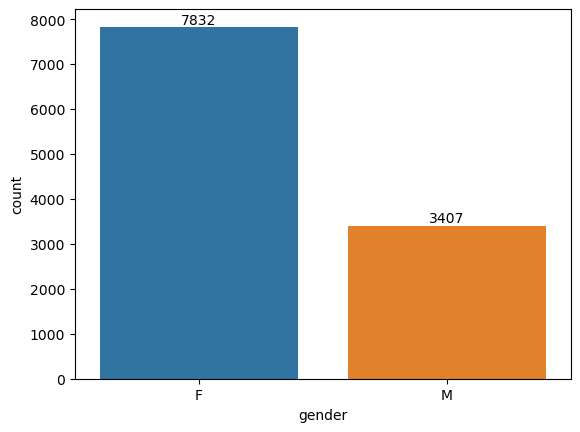

In [82]:
ax = sns.countplot(x='gender' ,data=df)
## Add lable 
for bars in ax.containers:
    ax.bar_label(bars)

In [83]:
df2 = df.groupby('gender')['amount'].sum()

In [84]:
sales_gender = df2.to_frame().reset_index().sort_values(by ='amount',ascending=False)

In [85]:
# Alternate
pd.DataFrame(df2).reset_index()

,gender,amount
0,F,74335853
1,M,31913276


<Axes: xlabel='gender', ylabel='amount'>

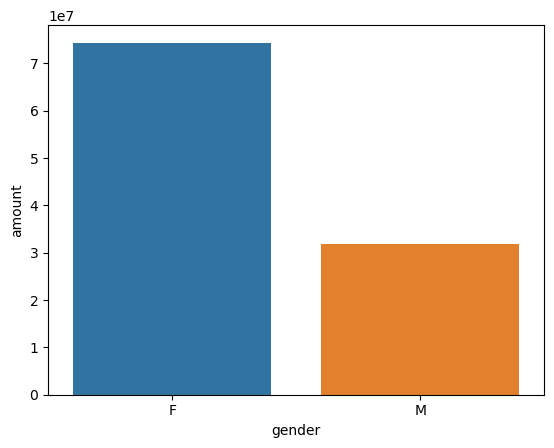

In [86]:
sns.barplot(x = 'gender',y='amount',data = sales_gender)

From the above 2 graphs we can conclude that the most of the buyers are females and also the puchasing power of the female is more then men

## Age 

In [87]:
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount'],
      dtype='object')

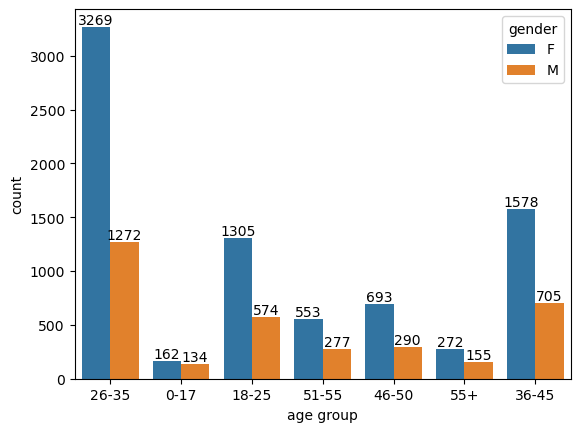

In [88]:
ax = sns.countplot(data = df, x= 'age group',hue='gender')
# Add values in the graph
for bars in ax.containers:
    ax.bar_label(bars)


total amount by group 

In [89]:
temp = df.groupby('age group')['amount'].sum().sort_values(ascending=False)
sales_age_group = pd.DataFrame(temp).reset_index()
sales_age_group.head()

,age group,amount
0,26-35,42613442
1,36-45,22144994
2,18-25,17240732
3,46-50,9207844
4,51-55,8261477


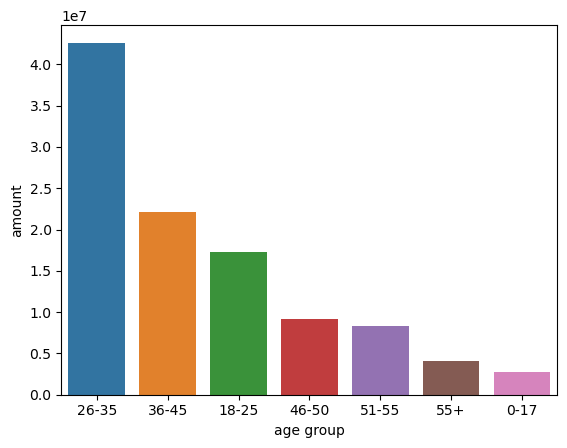

In [90]:
ax = sns.barplot(x='age group',y='amount',data=sales_age_group)
# Add labels
# for bars in ax.containers:
#     ax.bar_label(bars)


from the above graph we can see that the most of the buyers from the age group between 26-35

## State

In [91]:
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount'],
      dtype='object')

### State wise data

In [92]:
temp = df.groupby('state').sum(numeric_only=True) # Numeric_only shows only nnumeric columns
top_states = pd.DataFrame(temp).reset_index()
top_states.head()

,state,user_id,age,marital_status,orders,amount
0,Andhra Pradesh,813444768,28862,340,2051,8037146
1,Bihar,435279336,15419,189,1062,4022757
2,Delhi,1107443106,39245,471,2740,11603818
3,Gujarat,428278944,15473,159,1066,3946082
4,Haryana,453372900,15858,185,1109,4220175


### Top 10 highest orders from sates

In [93]:
highest_orders = top_states.sort_values(by='orders',ascending=False).head(10)

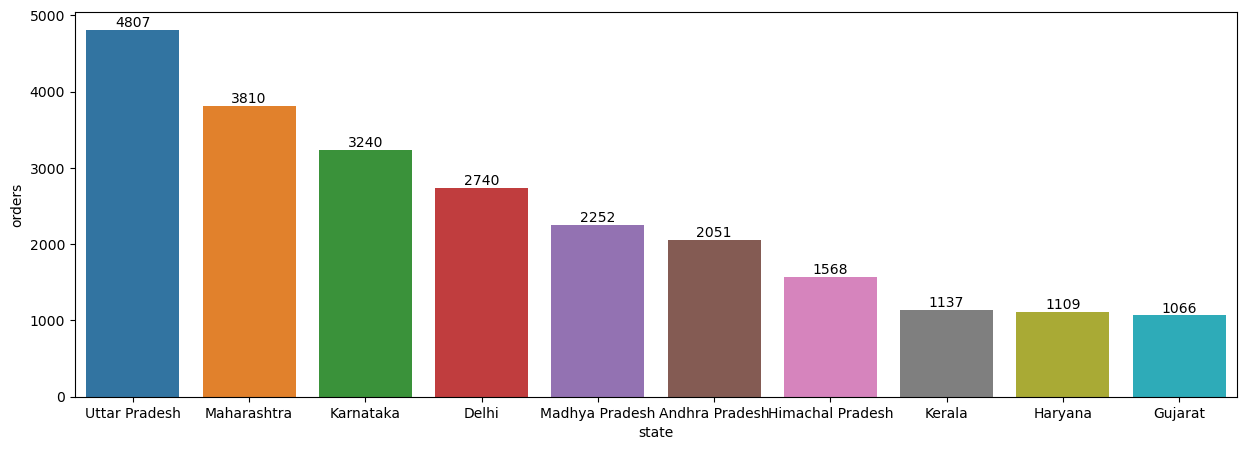

In [94]:
plt.figure(figsize=(15,5)) # adjust the figsize
ax = sns.barplot(data=highest_orders,x='state',y='orders')
for bars in ax.containers:
    ax.bar_label(bars)


### Total amount/sales from top 10 states

<Axes: xlabel='state', ylabel='amount'>

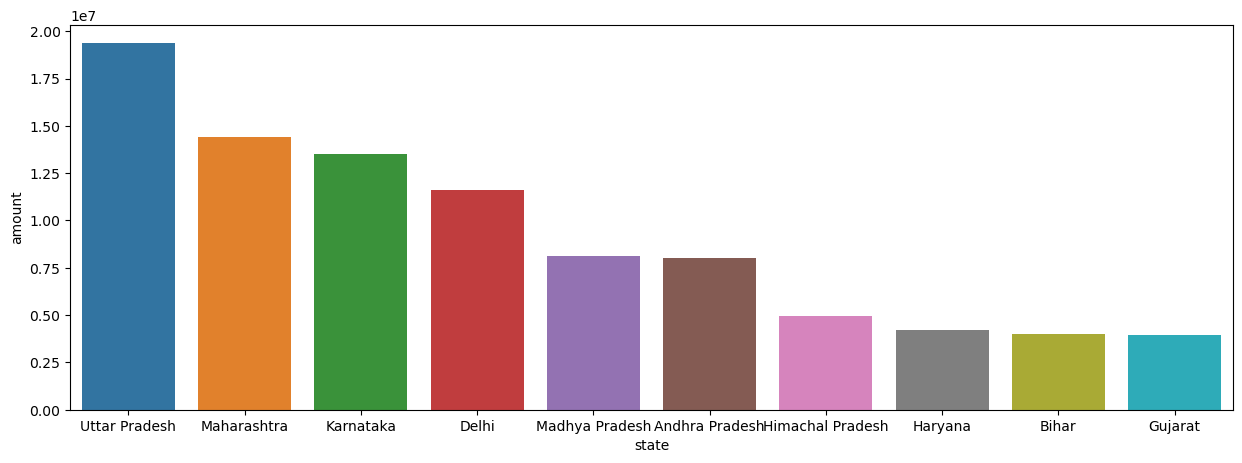

In [95]:
highest_amount = top_states.sort_values('amount',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=highest_amount, x='state', y='amount')

From the above graph we can see that most of the orders adn total sales amount are from UP,Maharashtra and karnataka respectively

## Marital status

In [96]:
df

,user_id,cust_name,product_id,gender,age group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [97]:
temp = df.groupby(['marital_status','gender']).sum(numeric_only=True)
marriage = pd.DataFrame(temp).reset_index()
marriage

,marital_status,gender,user_id,age,orders,amount
0,0,F,4586576436,162005,11393,43786646
1,0,M,1950959155,69673,4856,18338738
2,1,F,3268795983,114655,8155,30549207
3,1,M,1466425007,51644,3577,13574538


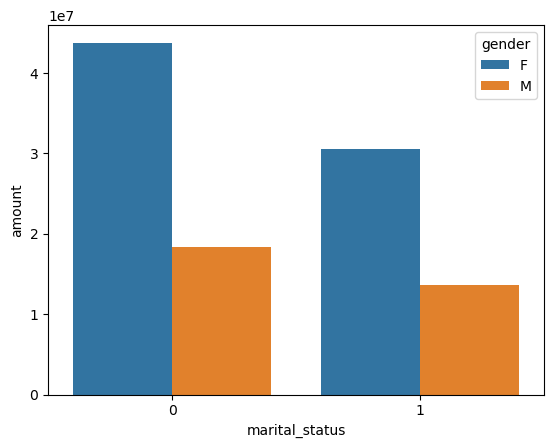

In [98]:
ax = sns.barplot(data=marriage,x='marital_status',y='amount',hue = 'gender')

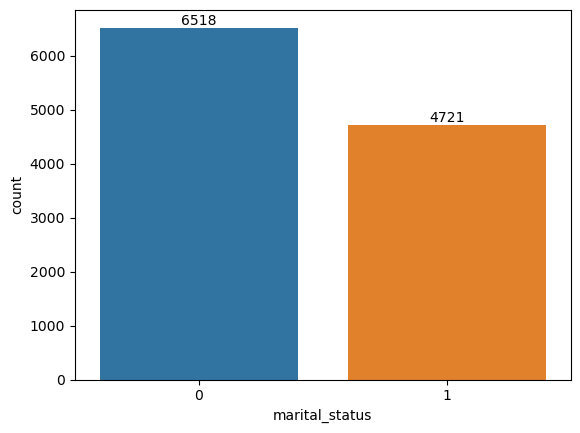

In [99]:
ax = sns.countplot(data=df,x='marital_status')
for bars in ax.containers:
    ax.bar_label(bars)

From the abover graph we can see that most of the buyers are married women and they have highest purchasing power

## Occupation

In [100]:
df

,user_id,cust_name,product_id,gender,age group,age,marital_status,state,zone,occupation,product_category,orders,amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [101]:
temp = df.groupby(['occupation']).sum(numeric_only=True).sort_values(by = 'amount',ascending=False)
occupation_wise = pd.DataFrame(temp).reset_index()
occupation_wise.head()

,occupation,user_id,age,marital_status,orders,amount
0,IT Sector,1587664067,56431,717,3997,14755079
1,Healthcare,1412271398,49532,394,3455,13034586
2,Aviation,1314031580,46009,583,3215,12602298
3,Banking,1140368011,40348,567,2817,10770610
4,Govt,856551738,30194,366,2155,8517212


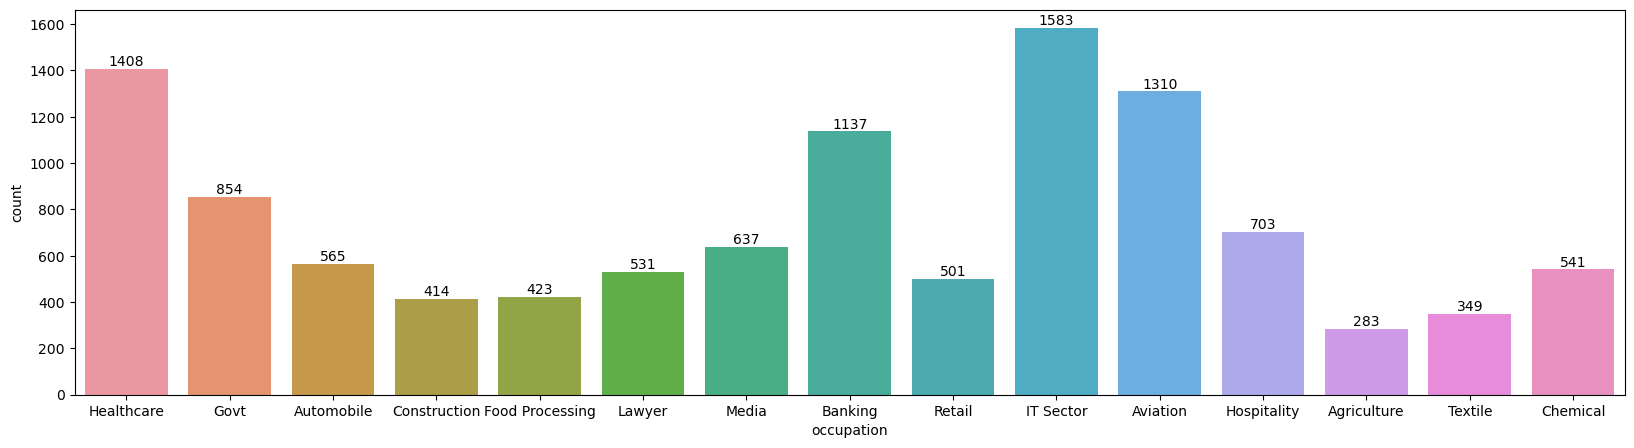

In [102]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(x='occupation',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='occupation', ylabel='amount'>

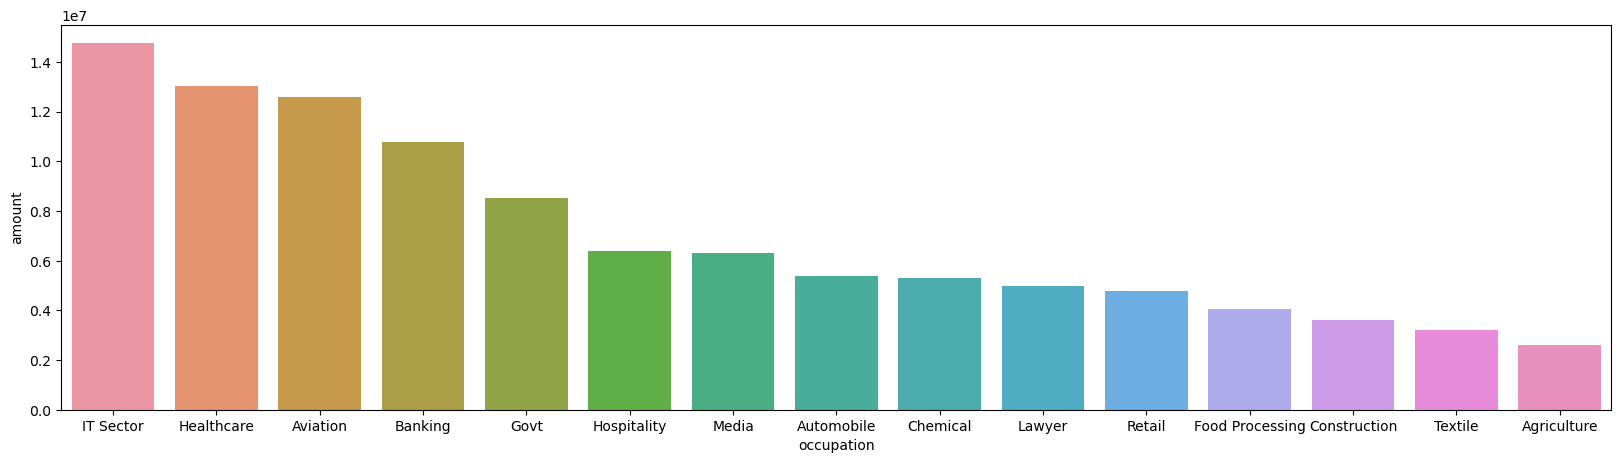

In [103]:
plt.figure(figsize=(20, 5))
sns.barplot(x='occupation',y='amount',data=occupation_wise)

Most of the buyer are from IT, Healthcare and Avaiation respectively

## product category

In [104]:
df.columns

Index(['user_id', 'cust_name', 'product_id', 'gender', 'age group', 'age',
       'marital_status', 'state', 'zone', 'occupation', 'product_category',
       'orders', 'amount'],
      dtype='object')

In [105]:
temp = df.groupby('product_category').sum(numeric_only=True).sort_values(by='amount',ascending=False).head(10)
category_wise = pd.DataFrame(temp).reset_index()

<Axes: xlabel='product_category', ylabel='count'>

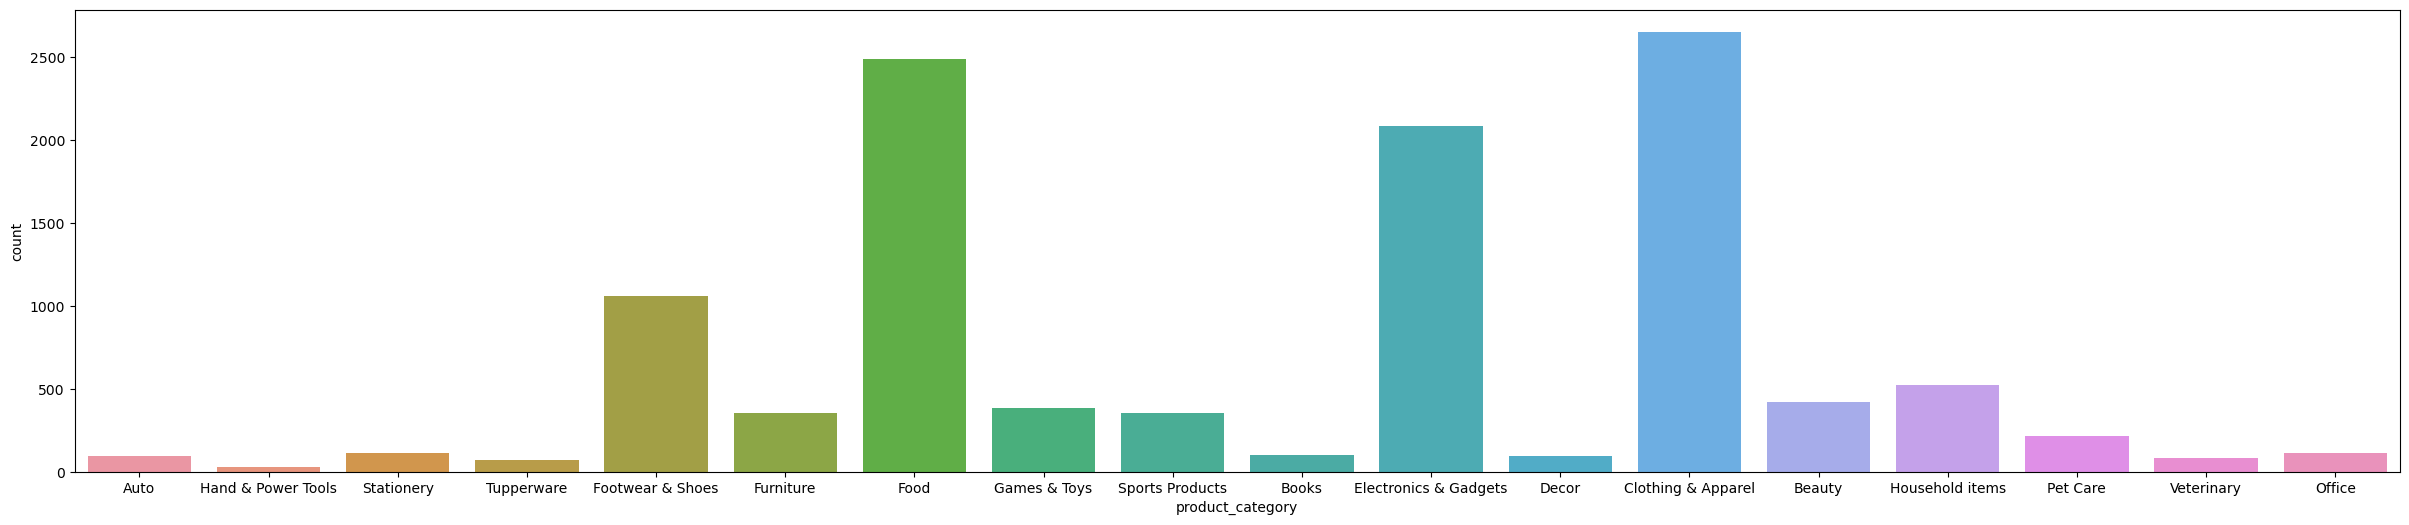

In [110]:
plt.figure(figsize=(30, 6))
sns.countplot(data=df,x='product_category')

<Axes: xlabel='product_category', ylabel='amount'>

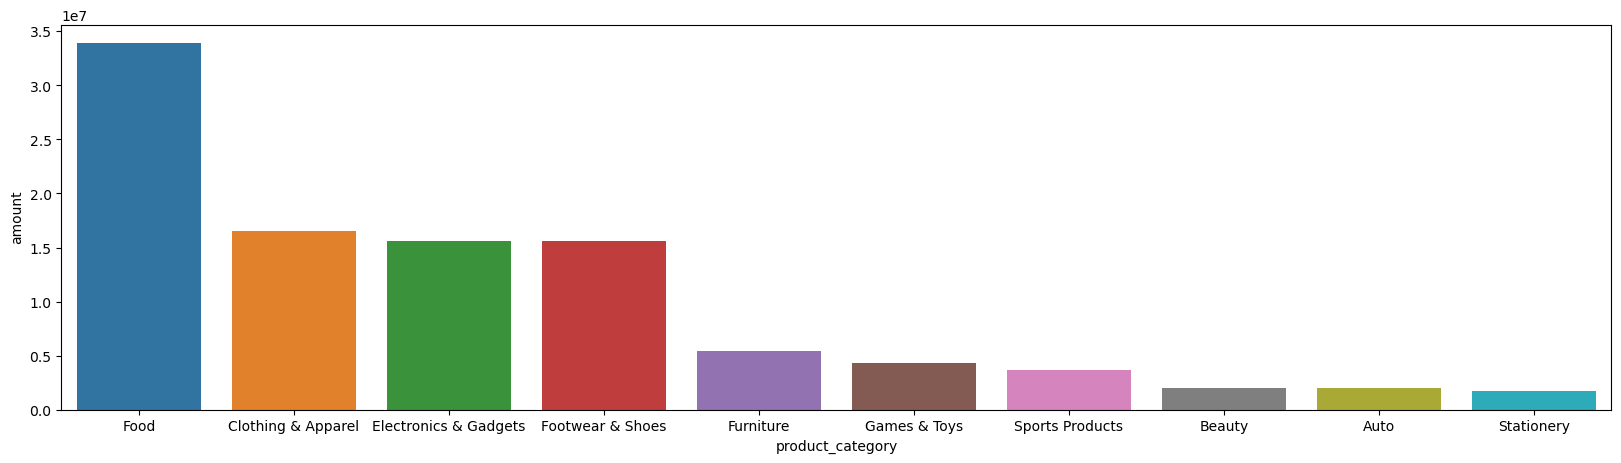

In [111]:
plt.figure(figsize=(20, 5))
sns.barplot(data=category_wise,x='product_category',y='amount')

From the above graph we can see that most of the sales are from food,clothing and electronic respectively